In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.cluster import KMeans

In [26]:
images_path = '../output_videos/player_1.jpg'
image = cv2.imread(images_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

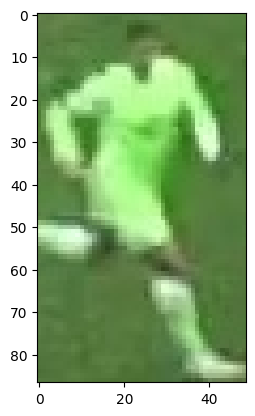

In [27]:
plt.imshow(image)

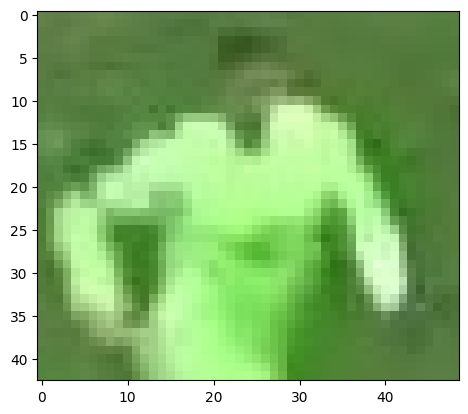

In [28]:
top_half_image = image[0: int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

cluster image into two clusters

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


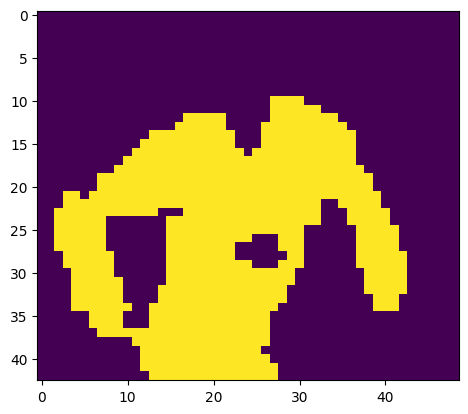

In [29]:
#reshape into 2d array
image_2d = top_half_image.reshape(-1, 3)
# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#get cluster labels
labels = kmeans.labels_

#reshape labels back into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display clustered image

plt.imshow(clustered_image)
plt.show()

In [30]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print('Non player cluster:', non_player_cluster)

Non player cluster: 0


In [31]:
player_cluster = 1- non_player_cluster
print('Player cluster:', player_cluster)

Player cluster: 1


In [32]:
kmeans.cluster_centers_[player_cluster]

array([170.50542005, 235.95257453, 142.57181572])